In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten


In [11]:
((train_data, train_labels),(test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

In [12]:
print(test_data.shape,train_labels.shape)

(10000, 28, 28) (60000,)


In [13]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  
test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)


In [14]:
train_labels

array([5, 0, 4, ..., 5, 6, 8])

In [15]:
model = K.Sequential([
                      # Dense(64,  activation='relu'),
                      # Dense(32,  activation='relu'),
                      Flatten(input_shape=(28, 28)),
                      Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [17]:
history = model.fit(x=train_data,y=train_labels, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50


D:\Python3-10\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 5s 3ms/step - loss: 0.5146 - accuracy: 0.8662 - val_loss: 0.3194 - val_accuracy: 0.9153
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3182 - accuracy: 0.9111 - val_loss: 0.2866 - val_accuracy: 0.9205
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2936 - accuracy: 0.9179 - val_loss: 0.2771 - val_accuracy: 0.9222
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2818 - accuracy: 0.9211 - val_loss: 0.2680 - val_accuracy: 0.9257
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2739 - accuracy: 0.9232 - val_loss: 0.2685 - val_accuracy: 0.9258
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2683 - accuracy: 0.9253 - val_loss: 0.2632 - val_accuracy: 0.9285
Epoch 7/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2640 - accuracy: 0.9254 - val_loss: 0.2626 - val_accuracy: 0.9283
Epo

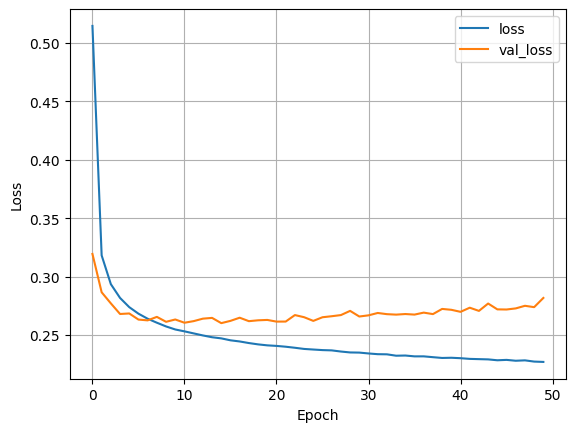

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [19]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

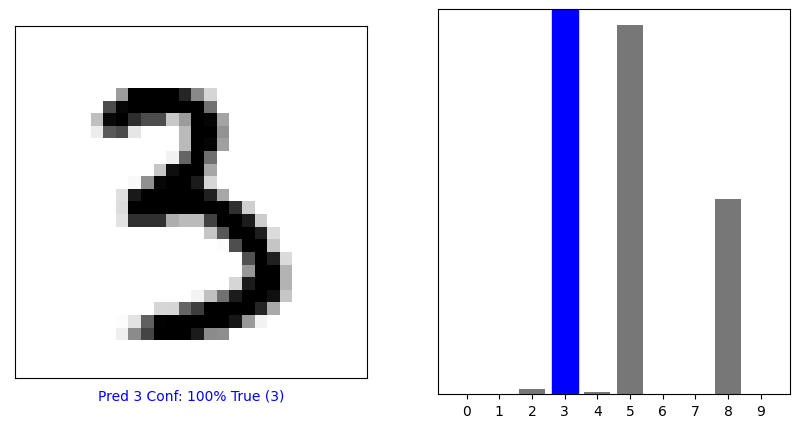

In [24]:
i = 32
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [25]:
better_model = K.Sequential([
                      Flatten(input_shape=(28, 28)),
                      Dense(128,  activation='relu'),
                      #Dense(64,  activation='relu'),
                      Dense(10, activation='softmax')
])
better_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
better_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
history = better_model.fit(x=train_data,y=train_labels, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2909 - accuracy: 0.9169 - val_loss: 0.1642 - val_accuracy: 0.9519
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1326 - accuracy: 0.9610 - val_loss: 0.1192 - val_accuracy: 0.9657
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0909 - accuracy: 0.9737 - val_loss: 0.1007 - val_accuracy: 0.9697
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0678 - accuracy: 0.9798 - val_loss: 0.1023 - val_accuracy: 0.9707
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0515 - accuracy: 0.9842 - val_loss: 0.0888 - val_accuracy: 0.9720
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0409 - accuracy: 0.9876 - val_loss: 0.0930 - val_accuracy: 0.9727
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9909 - val_loss: 0.0889 - val_accuracy:

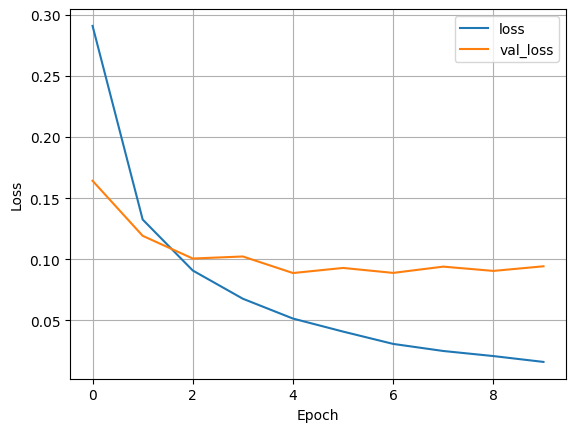

In [28]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

313/313 [==============================] - 1s 3ms/step


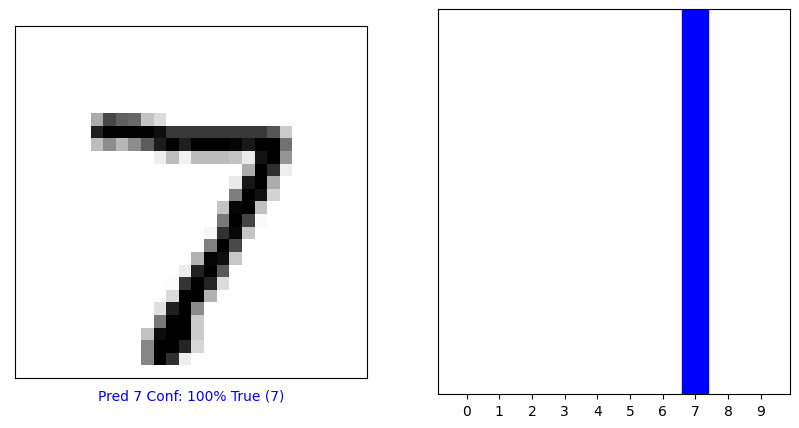

In [29]:
predictions = better_model.predict(test_data)
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()